In [55]:
import numpy as np
import pandas as pd
import cv2 as cv
#from google.colab.patches import cv2_imshow # for image display
from PIL import Image
import matplotlib.pylab as plt
from skimage import data
from skimage.feature import match_template
from skimage import draw as skdraw 
from skimage import io
from skimage import color

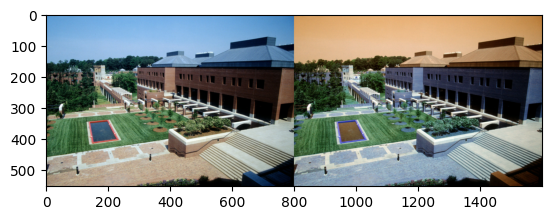

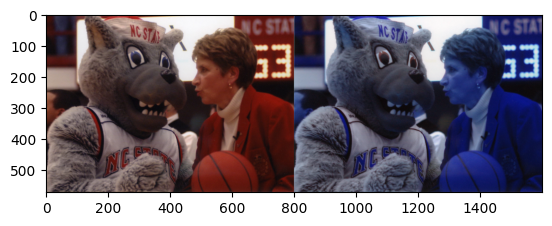

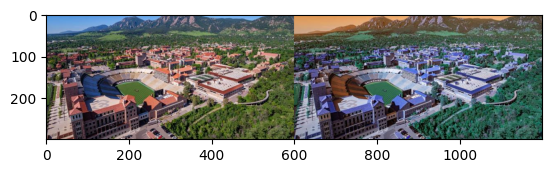

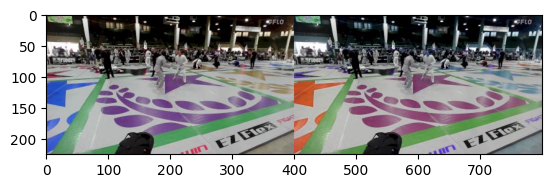

In [56]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
"https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
"https://www.colorado.edu/sites/default/files/styles/large_wide_thumbnail/public/callout/2021_aerial1288ga_0.jpg?itok=ebfdBBko",
"https://d2779tscntxxsw.cloudfront.net/9d6dbf6284aaf0cb39ff9a94d84d94c74d0d963e206.png?width=400&quality=80"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list
for n, url in enumerate(urls):
    plt.figure()
    image = io.imread(url)
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    final_frame = cv.hconcat((image, image_2))
    plt.imshow(final_frame)
    print('\n')
    plt.savefig(f'image_processing/img{n}.png')

Chapter 15.4: Image Histogram

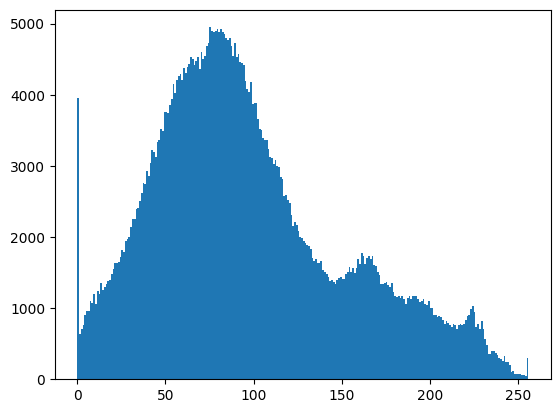

In [57]:
image = io.imread(urls[2])
plt.hist(image.ravel(),bins=256, range= [0,256])
plt.savefig('image_processing/histogram.png')

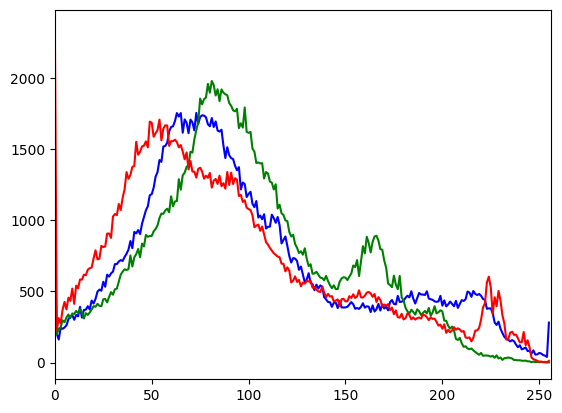

In [58]:
colors = ('b','g','r')
for i, col in enumerate(colors):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

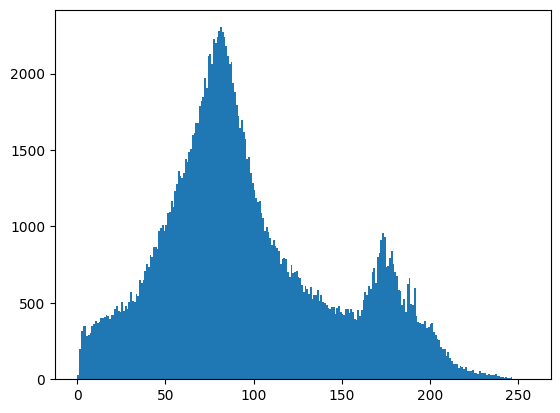

In [59]:
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
hist = plt.hist(grey.ravel(),bins=256, range= [0,256])
plt.savefig('image_processing/histogram_grey.png')



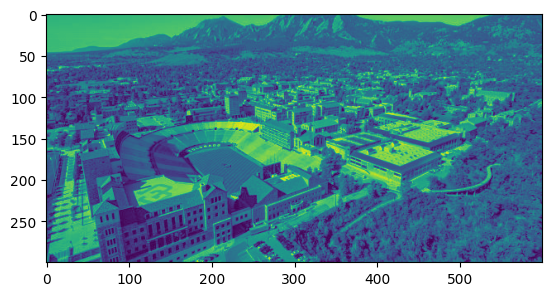

In [60]:
plt.imshow(grey)

Chapter 15.5: Contour

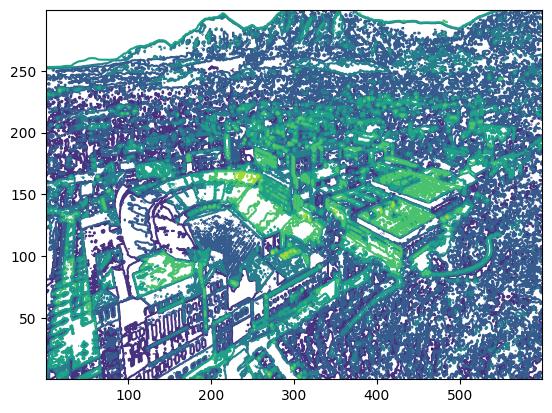

In [61]:
plt.contour(grey, origin= "image")
plt.savefig('image_processing/contour.png')

Chapter 15.6: Grayscale Transformation

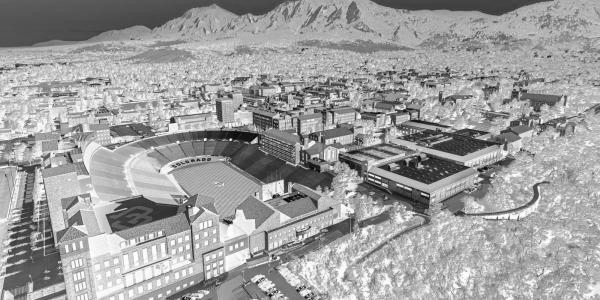

In [62]:
im2 = 255 - grey
result = Image.fromarray(im2.astype(np.uint8))
result.save('image_processing/negative.png')
Image.open('image_processing/negative.png')


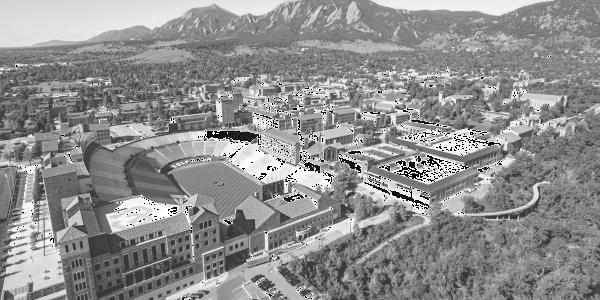

In [63]:
im3 = grey + 50
result = Image.fromarray(im3.astype(np.uint8))
result.save('image_processing/brighter.png')
Image.open('image_processing/brighter.png')

Chapter 15.7: Histogram Equalization

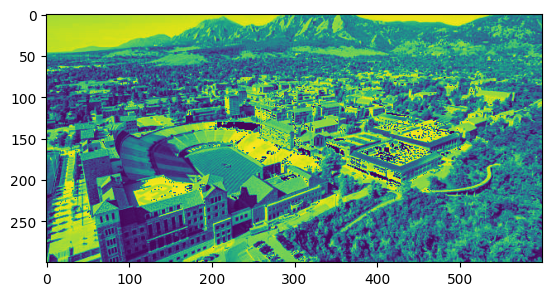

In [64]:
def histeq(image, num_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), num_bins, [0,256])
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = image_histogram.max()*cdf/cdf.max() # normalize  
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[image.astype('uint8')]
    
# apply the functions
im5 = histeq(im3)
plt.imshow(im5)

plt.show()

Chapter 15.8: Fourier Transform

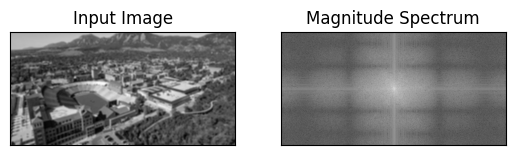

In [65]:
imBlur = cv.blur(grey, (5,5))
f = np.fft.fft2(imBlur)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Chapter 15.9: High Pass Filtering in FFT

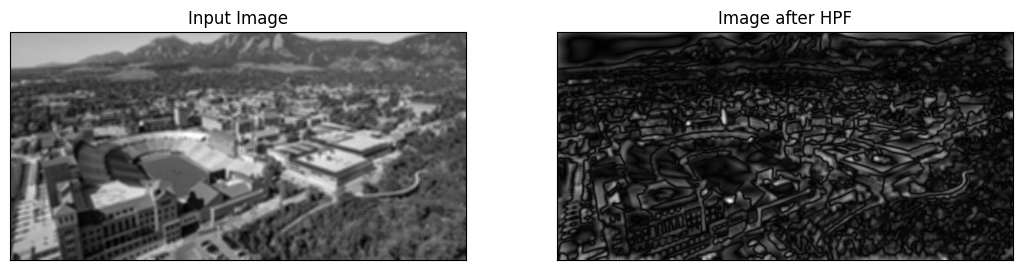

In [66]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()

Chapter 15.10: Pattern Recognition

Text(0.5, 1.0, 'Search Pattern in the Image')

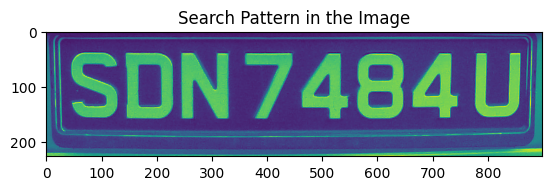

In [68]:
carPlate = io.imread("image_processing/plate.jpg")
full = color.rgb2gray(carPlate)
plt.imshow(full)
plt.title("Search Pattern in the Image")

Text(0.5, 1.0, 'Search pattern in this image')

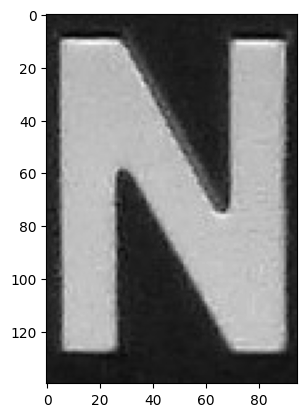

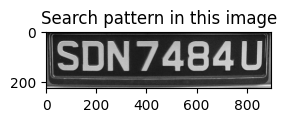

In [79]:
template = full[30:170, 240:335]
plt.imshow(template,cmap = plt.cm.gray)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")

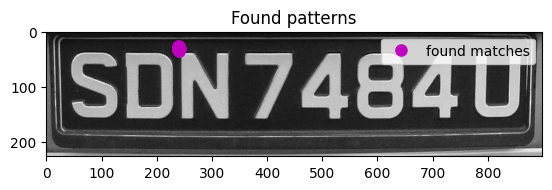

In [80]:
correlation=match_template(full,template)
xcoords=[]
ycoords=[]
for row in range(correlation.shape[0]):
    for col in range(correlation.shape[1]):
        if correlation[row,col]>0.9:
            #print(row,col,correlation[row,col])
            xcoords.append(col)
            ycoords.append(row)
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Found patterns")
plt.plot(xcoords,ycoords,'om',ms=8,label="found matches")
plt.legend(loc=2,numpoints=1)
plt.legend()
plt.show()

Chapter 15.11: Sample Code

(1019, 1600, 3)

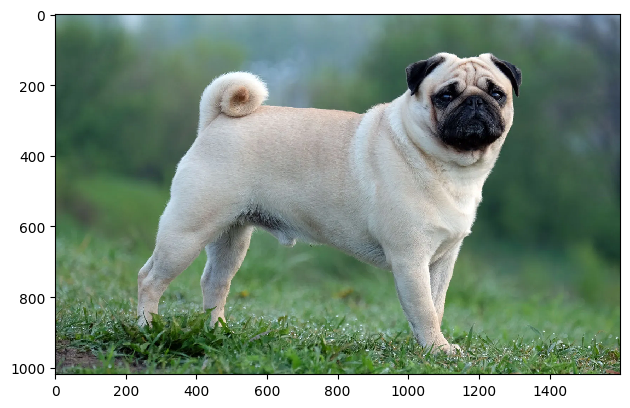

In [82]:
image = io.imread("image_processing/image.png")
io.imshow(image)
image.shape
 
 

(array([  93225.,  217114.,  806394., 1113357.,  864285.,  608625.,
         565219.,  397952.,  174235.,   50794.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

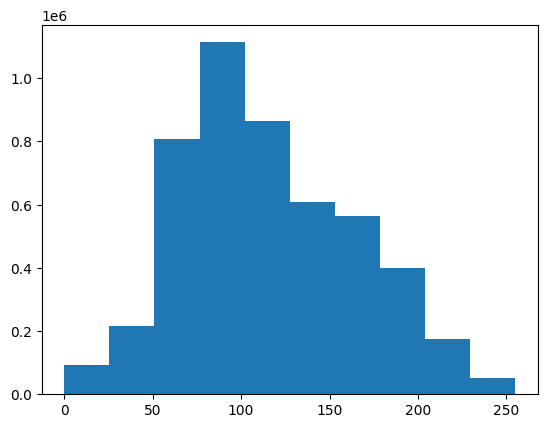

In [83]:
 plt.hist(image.flatten())

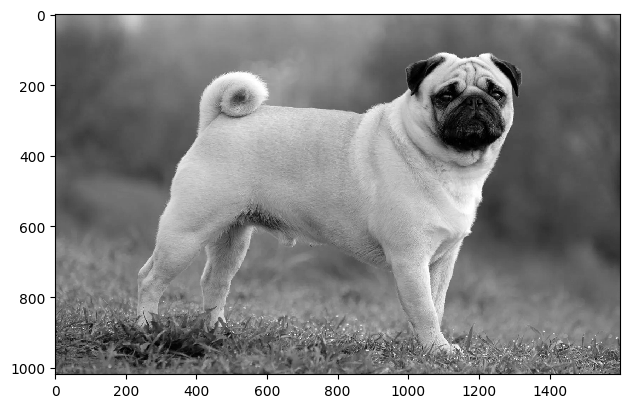

In [84]:
imageGray = color.rgb2gray(image)
io.imshow(imageGray)

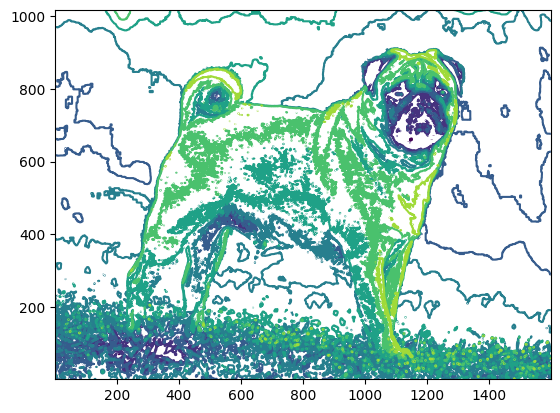

In [85]:
plt.contour(imageGray, origin = "image") 

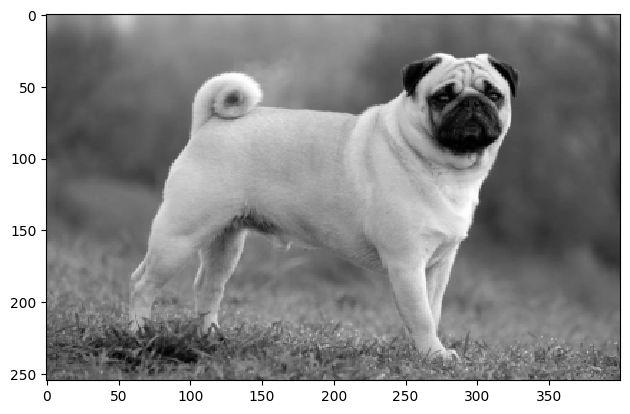

In [89]:
from  skimage.transform import rescale
image_rescaled = rescale(imageGray, 0.25)
io.imshow(image_rescaled)

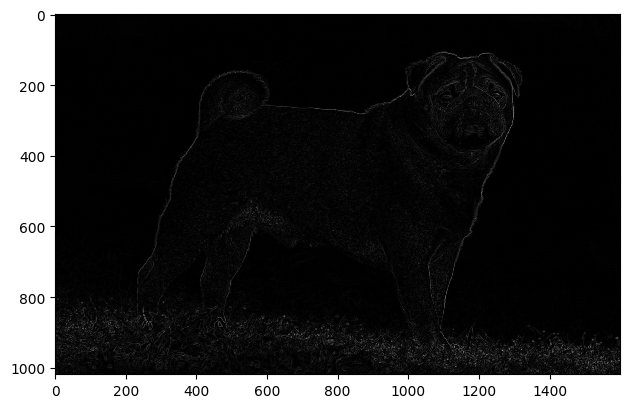

In [90]:
from skimage import filters
edges = filters.sobel(imageGray)
io.imshow(edges)
io.show()

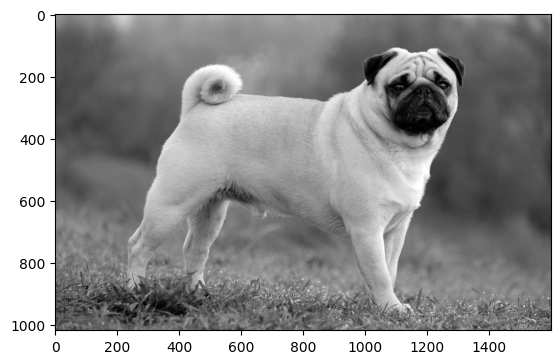

In [91]:
f = np.fft.fft2(imageGray)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
plt.imshow(imageGray, cmap = "gray")

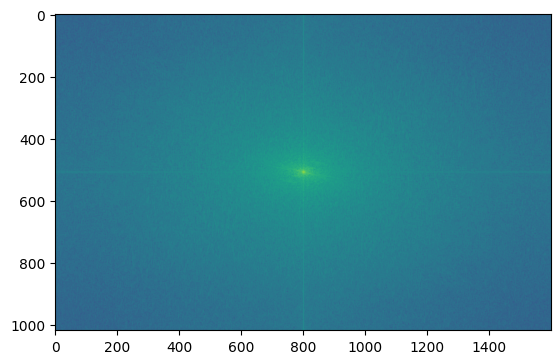

In [92]:
plt.imshow(magnitude_spectrum)
plt.show()

5
(60000, 28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
after [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


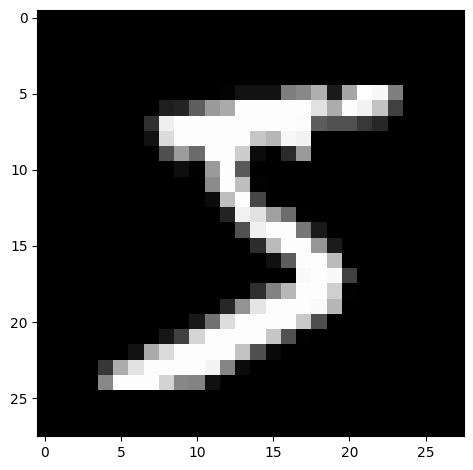

In [98]:
import keras
from keras import Input
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
(x_train, y_train), (x_test, y_test) = mnist.load_data()
io.imshow(x_train[0])
print(y_train[0])
print(x_train.shape)
print(x_train[0][0])
x_train = x_train.reshape(60000,28,28,1)
print("after", x_train[0][0])
x_test = x_test.reshape(10000,28,28,1)

In [99]:
print(y_train)
y_train = keras.utils.to_categorical(y_train, 10)
print("after", y_train[0])
y_test = keras.utils.to_categorical(y_test, 10)

[5 0 4 ... 5 6 8]
after [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [101]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [103]:
model.fit(x_train, y_train, batch_size=5000, epochs=1)
score = model.evaluate(x_train, y_train)
print(score)
score = model.evaluate(x_test, y_test)
print(score)

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2463 - loss: 5.5700
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1856 - loss: 4.7715
[4.772390842437744, 0.18559999763965607]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1854 - loss: 4.6583
[4.738037586212158, 0.186599999666214]
